In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

from base import supres

# Load Data

In [2]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

In [3]:
rpath = os.path.join(dropbox_dir,'result', 'base-strategy-learn.tsv')
results = read_tsv(rpath)

In [4]:
results.shape

(312000, 7)

In [5]:
results.head()

,pair,window_size,target,stop_loss,_return,target_hits,target_hits_rel
0,BTC_BAT,4,0.0100,-0.0100,-0.0500,10.0000,0.5000
1,BTC_BAT,4,0.0100,-0.0100,-0.0400,21.0000,0.6562
2,BTC_BAT,4,0.0100,-0.0100,-0.0600,6.0000,0.5000
3,BTC_BAT,4,0.0100,-0.0100,-0.1000,1.0000,1.0000
4,BTC_BAT,4,0.0100,-0.0100,-0.0200,68.0000,0.6733


# Find best params

In [37]:
cols = ['window_size', 'target', 'stop_loss', '_return']
aggregated = results.groupby(cols).mean().reset_index()

In [45]:
aggregated.query('target_hits > 500')\
    .sort_values('target_hits_rel', ascending=False)\
    .head(10)

,window_size,target,stop_loss,_return,target_hits,target_hits_rel
2609,8,0.0100,-0.1000,-0.0100,522.7667,0.9673
2619,8,0.0100,-0.0900,-0.0100,521.5000,0.9649
2629,8,0.0100,-0.0800,-0.0100,519.7000,0.9608
2639,8,0.0100,-0.0700,-0.0100,517.5667,0.9574
1309,6,0.0100,-0.1000,-0.0100,699.5333,0.9573
1319,6,0.0100,-0.0900,-0.0100,696.4000,0.9530
2649,8,0.0100,-0.0600,-0.0100,514.6333,0.9523
1329,6,0.0100,-0.0800,-0.0100,693.3667,0.9486
1339,6,0.0100,-0.0700,-0.0100,690.3667,0.9442
2659,8,0.0100,-0.0500,-0.0100,510.0000,0.9432


# See dependencies on target

In [69]:
def plot_selected(selected, window_size, stop_loss, _return):
    plt.figure(figsize=[10, 6])

    ax = sns.lineplot(selected['target'], selected['target_hits'], color='b', label='target_hits')
    ax2 = plt.twinx(ax)
    sns.lineplot(selected['target'], selected['target_hits_rel'], ax=ax2, color='r', label='target_hits_rel');

    plt.title(f'Target dependency - w {window_size} - _r {_return} - sl {stop_loss}', fontproperties=title_font)
    ax.legend(loc='upper left')
    ax.set_ylabel('target_hits', fontproperties=axis_font)
    ax2.set_ylabel('target_hits_rel', fontproperties=axis_font)
    ax.set_xlabel('target', fontproperties=axis_font);

In [48]:
window_size = 6
stop_loss = -.05

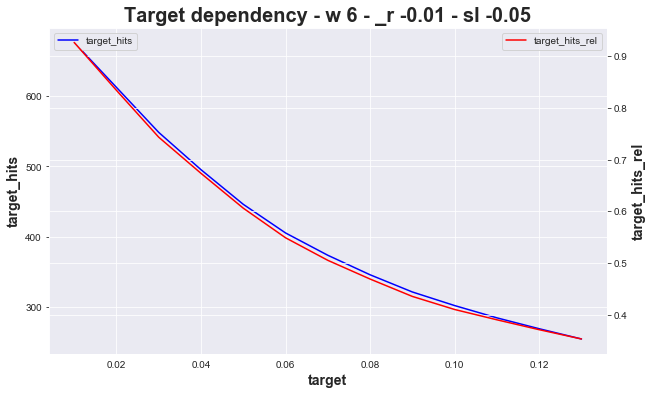

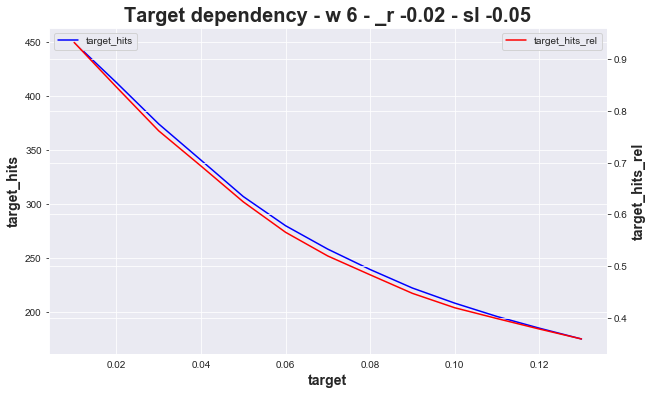

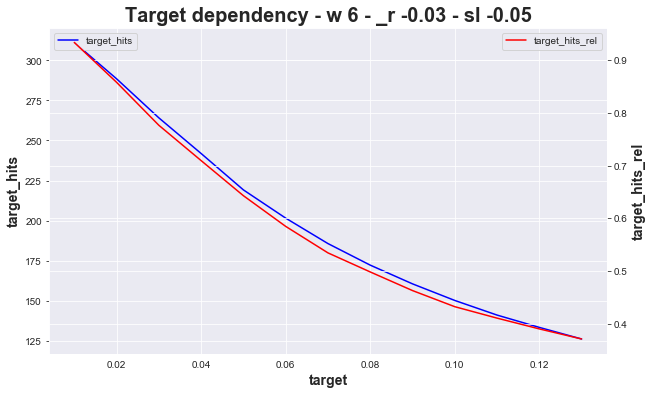

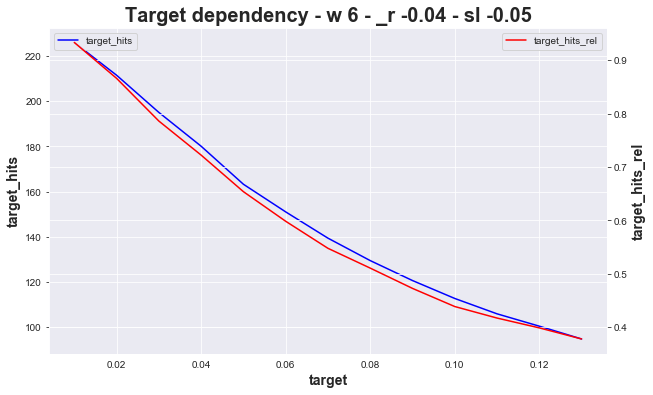

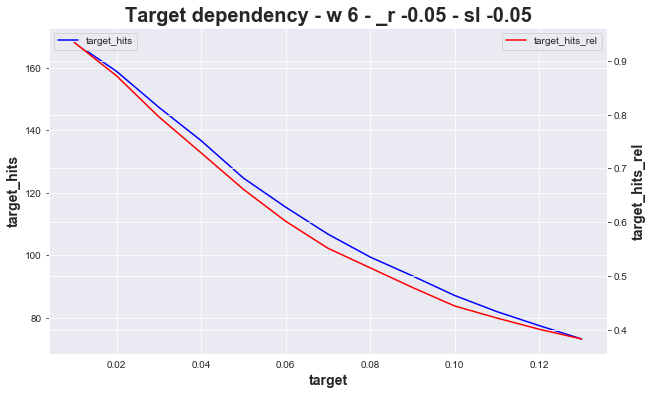

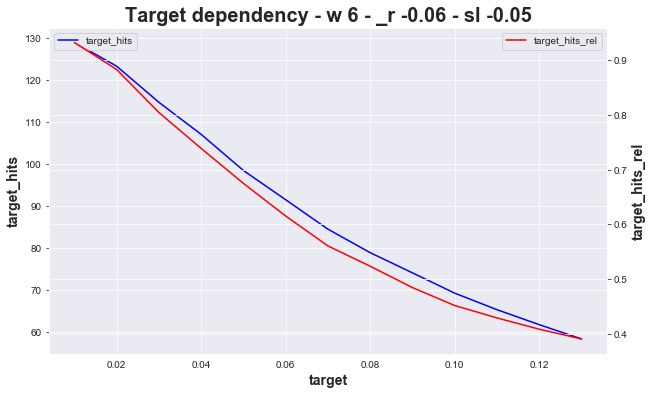

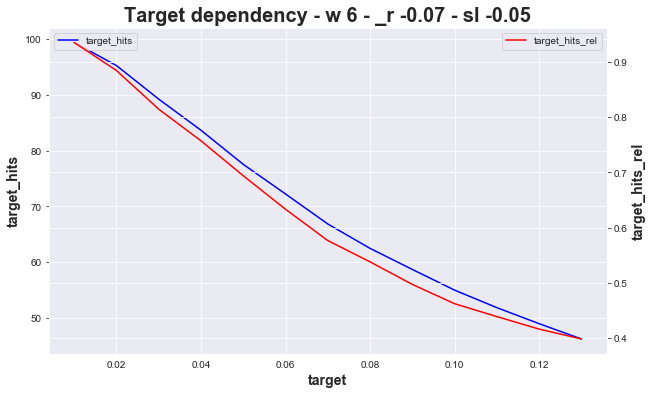

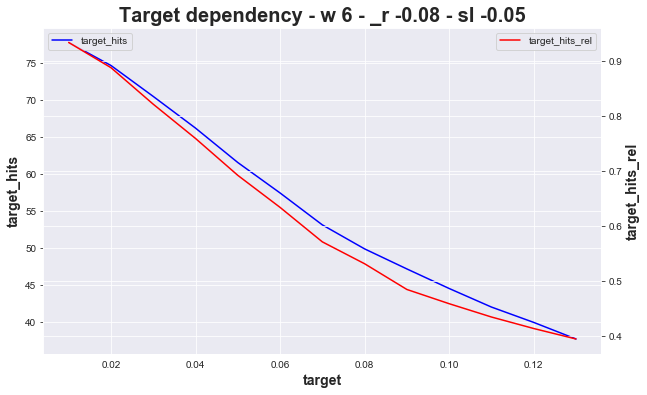

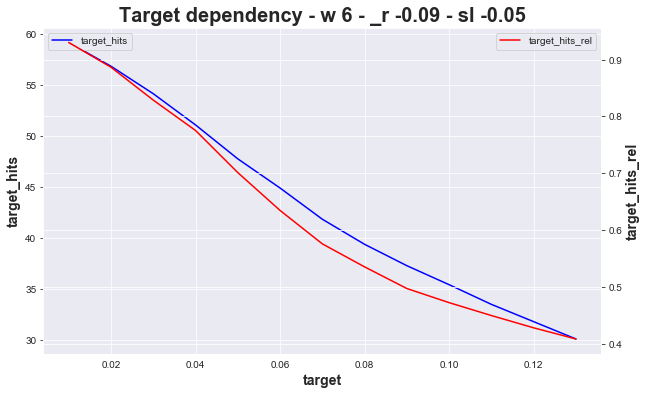

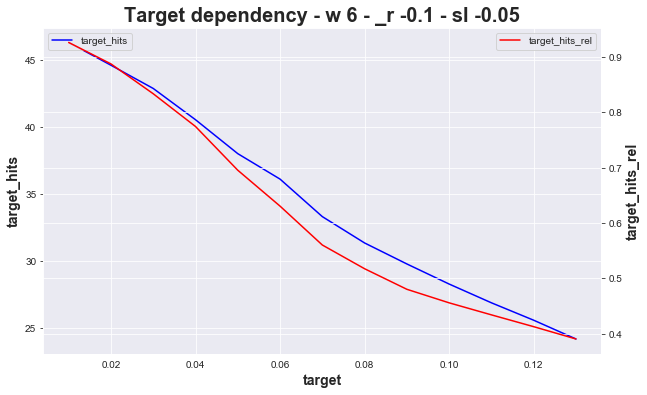

In [71]:
returns = results['_return'].drop_duplicates().sort_values(ascending=False).tolist()
for _return in returns:
    selected = aggregated.query(f'window_size == {window_size}')\
        .query(f'_return == {_return}')\
        .query(f'stop_loss == {stop_loss}')\
        .reset_index()
    plot_selected(selected, window_size, stop_loss, _return)